<a href="https://colab.research.google.com/github/FelixLamas/preentrega1/blob/main/ProyectoDSParteI%2BLamas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gym Members Exercise Tracking

El presente dataset, denominado "Gym Members Exercise Tracking", contiene información detallada sobre las métricas de salud y rutinas de ejercicio de 973 miembros de un gimnasio. Los datos recopilados abarcan un amplio espectro de variables fisiológicas y de rendimiento. Entre las variables demográficas y físicas se encuentran la edad, el género, el peso, la altura y el índice de masa corporal (BMI). En cuanto a las métricas fisiológicas, se registran la frecuencia cardíaca máxima (Max_BPM), promedio (Avg_BPM) y en reposo (Resting_BPM), así como el porcentaje de grasa corporal.

El núcleo del dataset reside en los datos de entrenamiento, que detallan el tipo de actividad realizada (Yoga, HIIT, Cardio, Fuerza), la duración de la sesión, las calorías quemadas, la frecuencia de entrenamiento semanal y el nivel de experiencia del usuario.

Objetivo: El propósito de este análisis es explorar las relaciones entre las características físicas de los usuarios y su rendimiento en el ejercicio. Nos interesa comprender qué factores influyen más significativamente en la quema de calorías y cómo el tipo de entrenamiento afecta la eficiencia del ejercicio. A través de este estudio, buscamos identificar patrones que permitan optimizar las rutinas de entrenamiento según el perfil del usuario (edad, peso, experiencia). Este análisis exploratorio servirá como base para futuros modelos predictivos que podrían estimar las calorías quemadas o recomendar tipos de ejercicios específicos para maximizar resultados de salud.



##Preguntas e Hipótesis:

Para guiar este análisis exploratorio, se plantean las siguientes hipótesis basadas en las variables disponibles:

Hipótesis 1 (Relación Duración-Calorías): Existe una correlación lineal positiva fuerte entre la duración de la sesión y las calorías quemadas. Sin embargo, se espera que esta correlación varíe según el tipo de entrenamiento (ej. HIIT debería quemar más por hora que Yoga).

Hipótesis 2 (Eficiencia por Tipo de Entrenamiento): Los entrenamientos de alta intensidad (HIIT y Cardio) mostrarán una mayor eficiencia calórica (calorías/hora) en comparación con los entrenamientos de Fuerza o Yoga, independientemente del peso del usuario.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# 1. Carga del Dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

# 2. Limpieza de nombres de columnas (Recomendado para evitar errores con espacios)
# Reemplazamos espacios y paréntesis por guiones bajos
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

print("Nombres de columnas limpios:")
print(df.columns.tolist())

# 3. Identificación de Valores Nulos
print("\n--- Valores Nulos por Columna ---")
print(df.isnull().sum())

Nombres de columnas limpios:
['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters', 'Workout_Frequency_days_week', 'Experience_Level', 'BMI']

--- Valores Nulos por Columna ---
Age                            0
Gender                         0
Weight_kg                      0
Height_m                       0
Max_BPM                        0
Avg_BPM                        0
Resting_BPM                    0
Session_Duration_hours         0
Calories_Burned                0
Workout_Type                   0
Fat_Percentage                 0
Water_Intake_liters            0
Workout_Frequency_days_week    0
Experience_Level               0
BMI                            0
dtype: int64


Valores Nulos: El análisis inicial (df.isnull().sum()) revela que el dataset está completo y no presenta valores nulos en ninguna variable, por lo que no fue necesario realizar imputaciones.

In [5]:
# Estadísticas descriptivas básicas
print("\n--- Resumen Estadístico ---")
display(df.describe())




--- Resumen Estadístico ---


,Age,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_week,Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


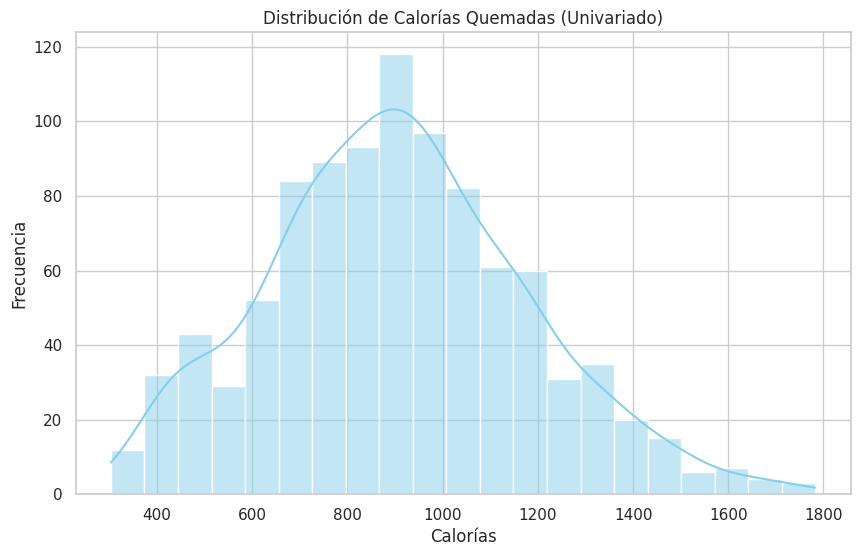

In [14]:
# FIGURA 1: Análisis Univariado (Distribución de Calorías)
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories_Burned'], kde=True, color='skyblue')
plt.title('Distribución de Calorías Quemadas (Univariado)')
plt.xlabel('Calorías')
plt.ylabel('Frecuencia')
plt.show()


Análisis Univariado (Histograma): Observamos que la distribución de calorías quemadas es bastante amplia, con un rango que va desde aprox. 300 hasta casi 1800 calorías, mostrando una ligera asimetría hacia la derecha.

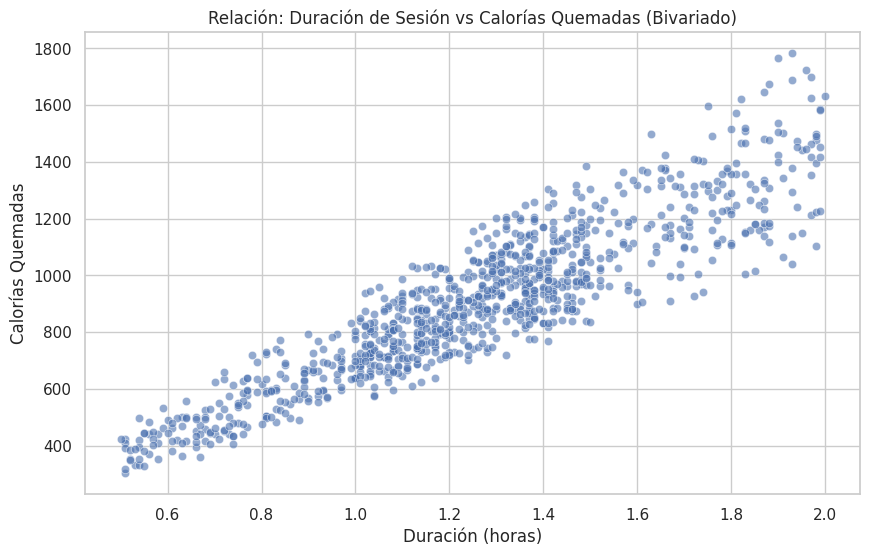

In [15]:
# FIGURA 2: Análisis Bivariado (Calorías vs Duración)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Session_Duration_hours', y='Calories_Burned', alpha=0.6)
plt.title('Relación: Duración de Sesión vs Calorías Quemadas (Bivariado)')
plt.xlabel('Duración (horas)')
plt.ylabel('Calorías Quemadas')
plt.show()

Se confirma la Hipótesis 1: Existe una relación lineal positiva muy clara; a más tiempo de ejercicio, más calorías se queman.

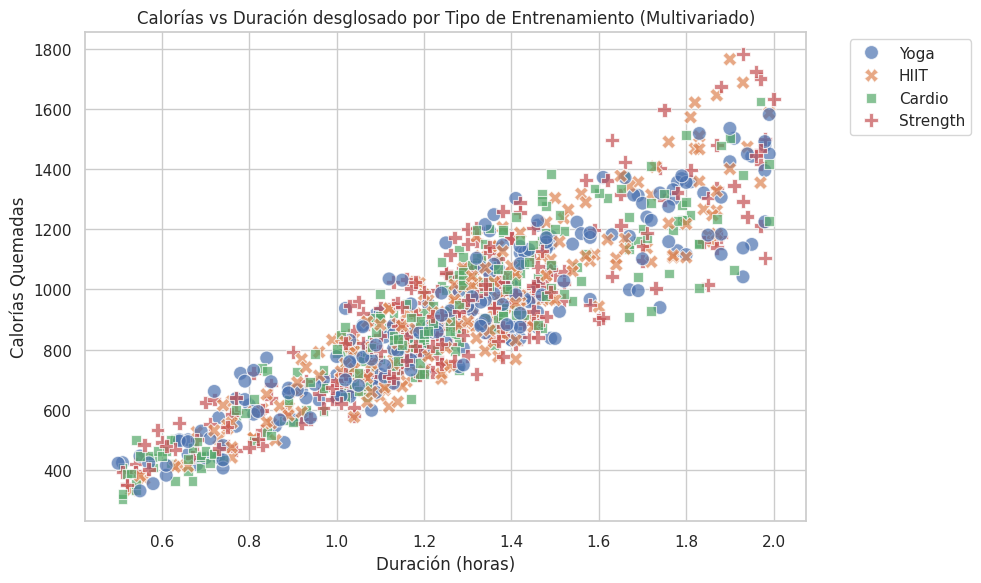

In [18]:
# FIGURA 3: Análisis Multivariado (El requisito de "al menos 3 variables")
# Variables: X=Duración, Y=Calorías, Color=Tipo de Workout
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Session_Duration_hours', y='Calories_Burned',
                hue='Workout_Type', style='Workout_Type', s=100, alpha=0.7)
plt.title('Calorías vs Duración desglosado por Tipo de Entrenamiento (Multivariado)')
plt.xlabel('Duración (horas)')
plt.ylabel('Calorías Quemadas')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Al agregar la tercera variable (Workout_Type) en el gráfico de dispersión, observamos la duración es el factor predominante en la quema total de calorías en este dataset específico

#Conclusión
 El dataset es de alta calidad (sin nulos) y la variable Session_Duration será el predictor más fuerte para cualquier modelo futuro.